![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

total women's goals = 596
total men's goals = 965
mean of women's goals is 2.98
mean of men's goals is 2.5130208333333335
ShapiroResult(statistic=0.8491013050079346, pvalue=3.8905201759850683e-13)
2.98
ShapiroResult(statistic=0.9266489744186401, pvalue=8.894154401688226e-13)
               T         dof alternative     p-val         CI95%   cohen-d  \
T-test  2.812823  340.102801   two-sided  0.005196  [0.14, 0.79]  0.261228   

         BF10     power  
T-test  4.463  0.848673  


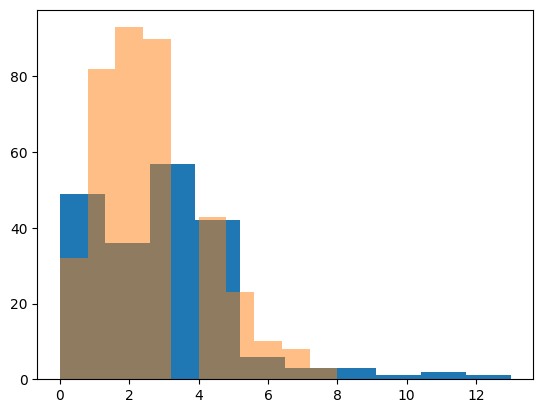

In [19]:
# Start your code here!
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pingouin as pg

#load both csv files
women_results = pd.read_csv("women_results.csv")
men_results = pd.read_csv("men_results.csv")

#changed women's and mens date from object to datetime
women_results['date'] = pd.to_datetime(women_results['date'])
men_results['date'] = pd.to_datetime(men_results['date'])

#filter tournaments
women_tournaments = women_results[women_results['tournament'] == 'FIFA World Cup']
men_tournaments = men_results[men_results['tournament'] == 'FIFA World Cup']

#filter dates
women_dates = women_tournaments[women_tournaments['date'] > '2002-01-01']
men_dates = men_tournaments[men_tournaments['date'] > '2002-01-01']

#sum total goals
women_dates['total_goals'] = women_dates['home_score'] + women_dates['away_score']
men_dates['total_goals'] = men_dates['home_score'] + men_dates['away_score']

print("total women's goals = " + str(women_dates['total_goals'].sum()))
print("total men's goals = " + str(men_dates['total_goals'].sum()))
print("mean of women's goals is " +str(women_dates['total_goals'].mean()))
print("mean of men's goals is " + str(men_dates['total_goals'].mean()))

#create sample for women's goals
np.random.seed(3)
sample_women_goals = women_dates['total_goals'].sample(frac=1, replace=False)
# check if it is a normal distribution 
print(stats.shapiro(sample_women_goals))
print(sample_women_goals.mean())

#create a sample for men's goals
np.random.seed(4)
sample_men_goals = men_dates['total_goals'].sample(frac=1, replace=False)
#check if it is a normal distribution
print(stats.shapiro(sample_men_goals))
#checking by looking at the histograms. I had looked before histograms of the populations and the samples before doing the Shapiro test as well to double check normal distribution. 
plt.hist(x=sample_women_goals)
plt.hist(x=sample_men_goals, alpha=0.5)

#t-test
test_results = pg.ttest(x=sample_women_goals, y=sample_men_goals, paired=False, alternative="two-sided")
#setting pandas to display all columns to see p-value
pd.set_option('display.max_columns', None)
#print results
print(test_results)

# P-Value is less than the significance level of 10%. We reject the Null Hypothesis. 
#conclusion dictionary
result_dict = {"p_val": 0.005196, "result": "reject"}
